In [1]:
#!pip install greek-stemmer

In [2]:
import demoji
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import PorterStemmer
from greek_stemmer import GreekStemmer


In [3]:
# Create stemmer objects for English and Greek
english_stemmer = PorterStemmer()
#greek_stemmer = GreekStemmer()

In [4]:
# Remove emojis
def remove_emoji(string):
    return demoji.replace(string, '')

# Remove non-alphanumeric characters
def preprocess_text(text):
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Function to perform stemming on a single word based on its language
def stem_word(word):
    #if word.isalpha():
        #if word.isascii():
    word = english_stemmer.stem(word)
        #else:
            #return greek_stemmer.stem(word)
    return word

# Load Dataset

In [5]:
# Read the CSV file and drop unneeded columns 
reviews = pd.read_csv('reviews.csv', encoding='utf-8')
reviews = reviews.drop(columns=['Business_name', 'Username', 'Visit Date', 'Review Title'], axis=1)

# Dataset Preprocessing

In [6]:
# Stop words
stop_words = set(stopwords.words("english"))

stop_words_english = set(stopwords.words('english'))
stop_words_greek = set(stopwords.words('greek'))
stop_words = stop_words_english.union(stop_words_greek)
stop_words = list(stop_words)
stop_words.extend(['from', 'subject', 're', 'edu', 'use','i', 'the', 'she', 'her', 'we']) # Add custom words to remove

reviews['Review Date'] = pd.to_datetime(reviews['Review Date'])
# Remove punctuation, stop words and emojis, apply stemming and convert to lowercase 
reviews['Review Text'] = reviews['Review Text'].map(lambda x: ' '.join([stem_word(word) for word in word_tokenize(preprocess_text(remove_emoji(x.translate(str.maketrans('', '', string.punctuation)).lower()))) if word not in stop_words]))

# Calculate word frequencies over time

In [7]:
# Create a dictionary to store word frequencies over time
word_frequencies = defaultdict(lambda: defaultdict(int))

for _, row in reviews.iterrows():
    text = row['Review Text']
    rating = row['Rating']
    review_date = row['Review Date']
    month = review_date.year * 100 + review_date.month  

    if text and rating and month:
        words = text.split()
        for word in words:
            word_frequencies[word][month] += 1    


# Calculate the growth rate for each word over time

In [8]:
word_growth_rates = defaultdict(list)

# Calculate the growth rate for each word over time
word_growth_rates = defaultdict(list)
for word, frequencies in word_frequencies.items():
    sorted_months = sorted(frequencies.keys())
    if len(sorted_months) > 1:
        for i in range(1, len(sorted_months)):
            year_month_diff = sorted_months[i] - sorted_months[i-1]
            growth_rate = (frequencies[sorted_months[i]] - frequencies[sorted_months[i-1]]) / year_month_diff
            word_growth_rates[word].append((sorted_months[i], growth_rate))



# Sort words based on their growth rates

In [9]:
sorted_growth_rates = sorted(word_growth_rates.items(), key=lambda x: x[1][-1][1], reverse=True)
sorted_shrink_rates = sorted(word_growth_rates.items(), key=lambda x: x[1][-1][1])

# Get the top 10 growing and shrinking words

In [10]:
top_10_growing_words = sorted_growth_rates[:10]
top_10_shrinking_words = sorted_shrink_rates[:10]

# Plotting the growth rates of the top 10 growing words

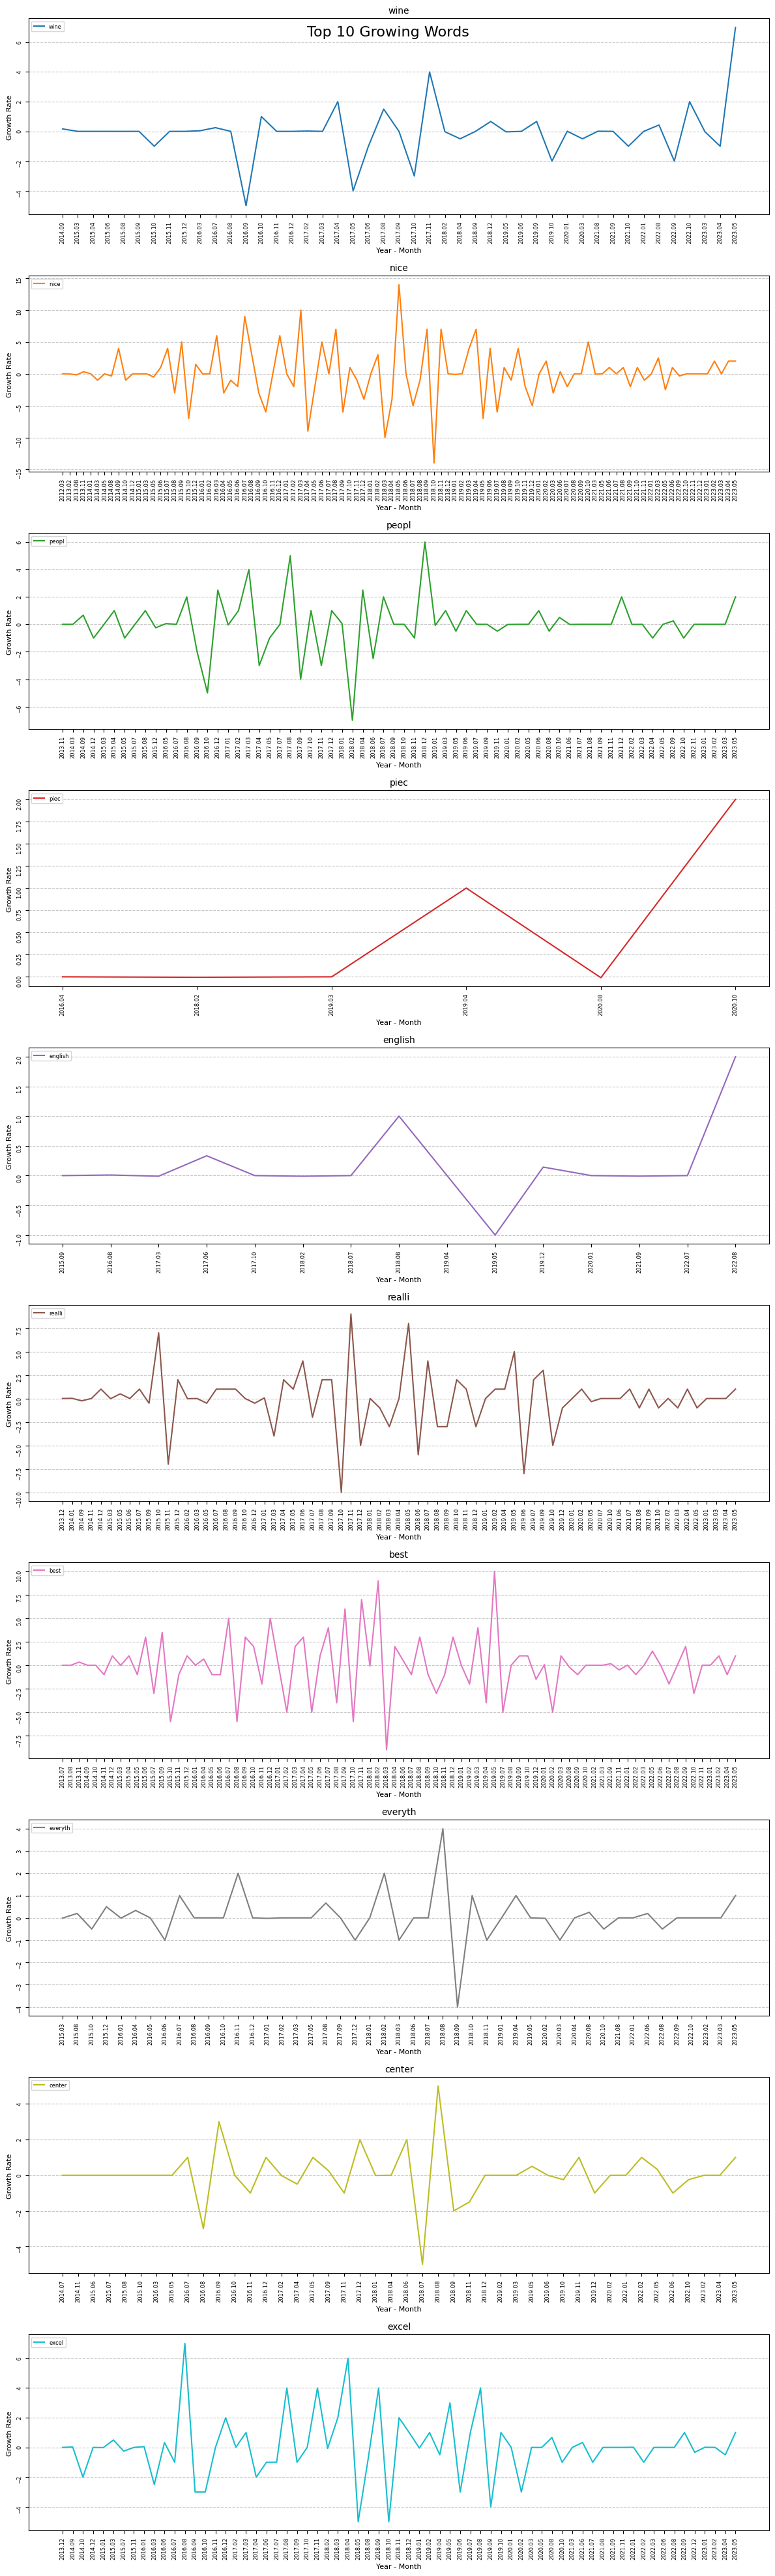

In [11]:
fig, axs = plt.subplots(10, 1, figsize=(12, 40))
fig.suptitle("Top 10 Growing Words", fontsize=16)

for i, (word, growth_rates) in enumerate(top_10_growing_words):
    ax = axs[i]  # Use the current index as the subplot index

    years, rates = zip(*growth_rates)  # Extract years and rates from growth_rates

    # Convert the key values to the desired format "YYYY.MM"
    formatted_years = [f"{str(year)[:4]}.{str(year)[4:].zfill(2)}" for year in years]

    ax.plot(formatted_years, rates, label=word, color=f"C{i}")
    ax.set_xlabel("Year - Month", fontsize=8)
    ax.set_ylabel("Growth Rate", fontsize=8)
    ax.set_title(word, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.tick_params(labelsize=6, rotation=90)  # Rotate x-axis tick labels by 90 degrees
    ax.legend(fontsize=6, loc='upper left')

plt.tight_layout()
plt.show()





# Plotting the growth rates of the top 10 shrinking words

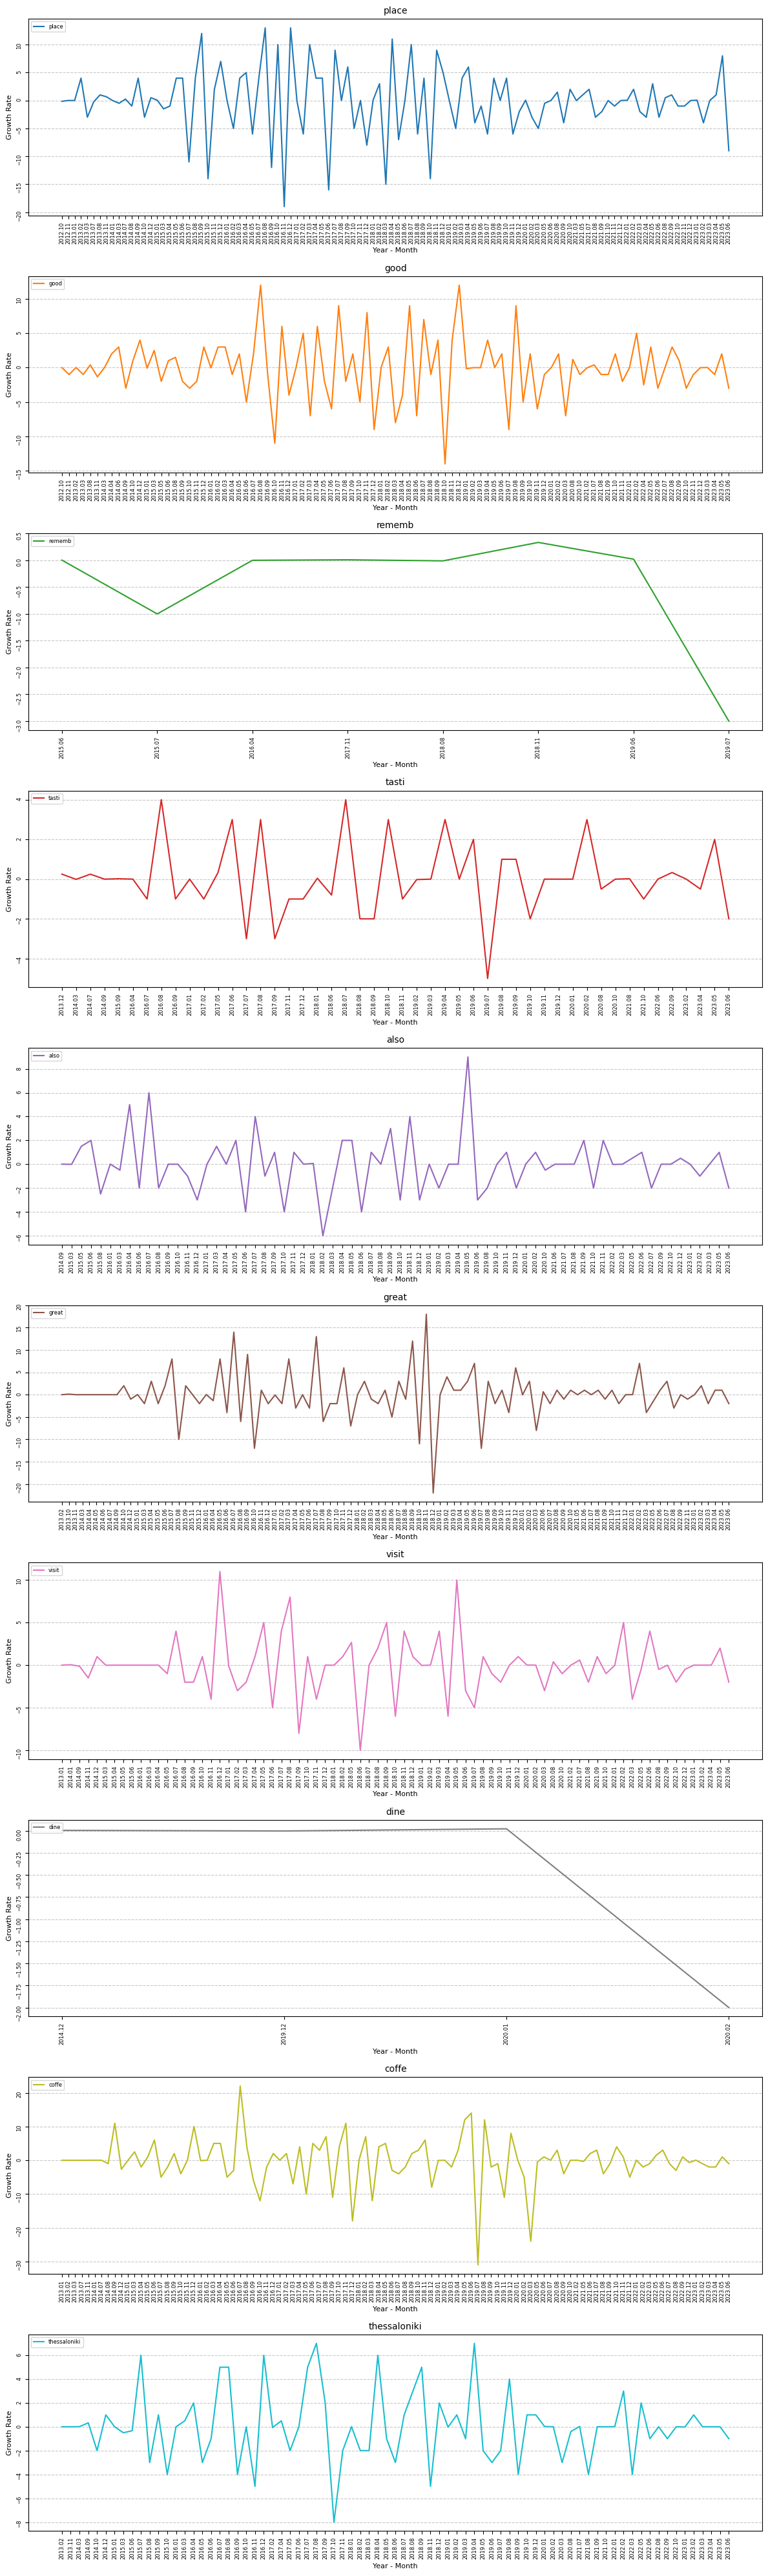

In [12]:
fig, axs = plt.subplots(10, 1, figsize=(12, 40))  
plt.title("Top 10 Shrinking Words", fontsize=16) 


for i, (word, growth_rates) in enumerate(top_10_shrinking_words):
    ax = axs[i]  # Use the current index as the subplot index
    
    years, rates = zip(*growth_rates)

    # Convert the key values to the desired format "YYYY.MM"
    formatted_years = [f"{str(year)[:4]}.{str(year)[4:].zfill(2)}" for year in years]

    ax.plot(formatted_years, rates, label=word, color=f"C{i}")
    ax.set_xlabel("Year - Month", fontsize=8)
    ax.set_ylabel("Growth Rate", fontsize=8)
    ax.set_title(word, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.tick_params(labelsize=6, rotation=90)  # Rotate x-axis tick labels by 90 degrees
    ax.legend(fontsize=6, loc='upper left')

plt.tight_layout()
plt.show()